<a href="https://colab.research.google.com/github/Teste1811/testes-colab/blob/main/VGSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---

# **Análise Exploratória de Dados - Video Game Sales**

---
---
(introduzir)

---


##Carregamento das bibliotecas e dos dados


---

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas_profiling import ProfileReport

%matplotlib inline
plt.rc('figure', figsize = (20,10))

In [2]:
# Carregando o dataset
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/CSV/vgsales.csv")

In [3]:
# Visualizando as 5 primeiras colunas no dataset
dataframe.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [4]:
# Visualizando as 5 ultimas colunas no dataset
dataframe.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16319,16565,Mighty No. 9,XOne,2016,Platform,Deep Silver,0.01,0.00,0.00,0.0,0.01
16320,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.0,0.01
16321,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.0,0.01
16322,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.0,0.01
16323,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.00,0.00,0.01,0.0,0.01


In [5]:
# Mudando as colunas para o português

dataframe.columns = ["Ranking", "Nome", "Plataforma", "Ano", 
"Genero", "Editora", "vendas_America_do_Norte", "vendas_Europa", "vendas_Japao", 
"vendas_outras", "vendas_Globais"]

dataframe.head()

,Ranking,Nome,Plataforma,Ano,Genero,Editora,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras,vendas_Globais
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [6]:
# Checando quais colunas tem valores nulos em seus registros
# Somente 'Editora' possui valores nulos, então não vou apagá-los
dataframe.isnull().sum()

Ranking                     0
Nome                        0
Plataforma                  0
Ano                         0
Genero                      0
Editora                    36
vendas_America_do_Norte     0
vendas_Europa               0
vendas_Japao                0
vendas_outras               0
vendas_Globais              0
dtype: int64

In [7]:
# Checando a existência de registros duplicados
len(dataframe[dataframe.duplicated()])

0

In [8]:
# Verificando quais são os tipos de das variáveis do dataframe
dataframe.dtypes

Ranking                      int64
Nome                        object
Plataforma                  object
Ano                          int64
Genero                      object
Editora                     object
vendas_America_do_Norte    float64
vendas_Europa              float64
vendas_Japao               float64
vendas_outras              float64
vendas_Globais             float64
dtype: object

In [9]:
# Visualisando as descrições estatísticas do dataset
dataframe[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras', 'vendas_Globais']].describe().round(2)

,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras,vendas_Globais
count,16324.00,16324.00,16324.00,16324.00,16324.00
mean,0.27,0.15,0.08,0.05,0.54
std,0.82,0.51,0.31,0.19,1.57
min,0.00,0.00,0.00,0.00,0.01
25%,0.00,0.00,0.00,0.00,0.06
50%,0.08,0.02,0.00,0.01,0.17
75%,0.24,0.11,0.04,0.04,0.48
max,41.49,29.02,10.22,10.57,82.74


---


##Qual o grau de correlação entre as variáveis?


---

In [10]:
# criando a variável referente à correlação dos dados
correlacao = dataframe[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras', 'vendas_Globais']].corr()
correlacao

,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras,vendas_Globais
vendas_America_do_Norte,1.000000,0.768932,0.451280,0.634503,0.941267
vendas_Europa,0.768932,1.000000,0.436408,0.726262,0.903269
vendas_Japao,0.451280,0.436408,1.000000,0.290646,0.612790
vendas_outras,0.634503,0.726262,0.290646,1.000000,0.747971
vendas_Globais,0.941267,0.903269,0.612790,0.747971,1.000000


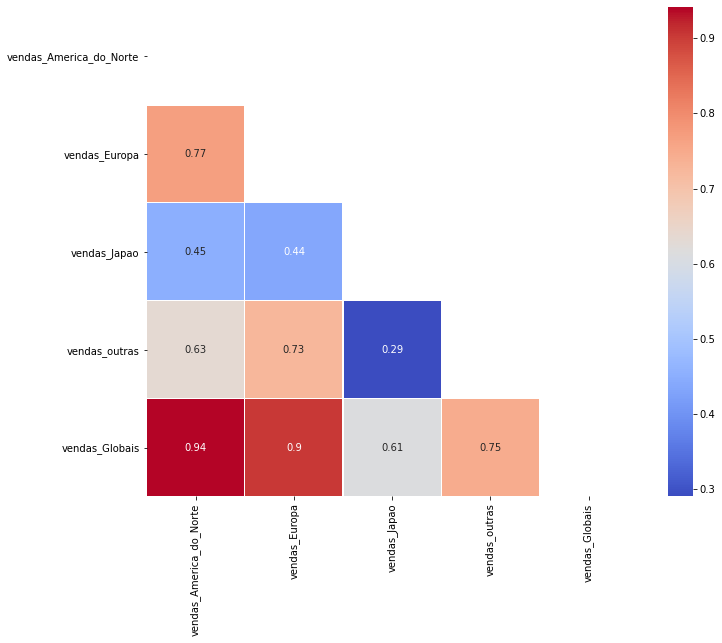

In [11]:
# Plotando o heatmap apartir dos dados acima
plt.figure(figsize=(11,9))

mask = np.triu(np.ones_like(correlacao, dtype=bool))

sns.heatmap(correlacao, mask = mask, annot = True, cmap = 'coolwarm', linewidths=.2)

O gráfico acima retrata a correlação entre as variáveis do dataframe. Os números apresentados acima são calculados por meio do "Coeficiente de correlação de Pearson": 



---



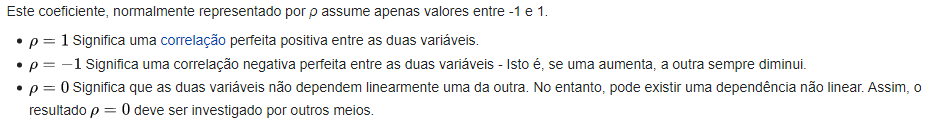



---



Nota-se portanto, que existe uma grande correlação das vendas da América do Norte e Europa com as vendas Globais.

Text(0.5, 1.0, 'Vendas Globais / Vendas América do Norte')

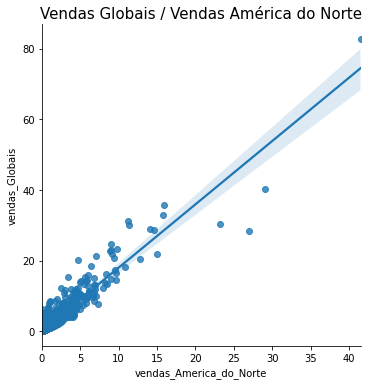

In [12]:
# Plotando outros gráficos relacionadas a coorelação de cada região em relação às vendas globais
sns.lmplot(x = 'vendas_America_do_Norte', y = 'vendas_Globais', data=dataframe)
plt.title('Vendas Globais / Vendas América do Norte', fontdict = {'fontsize': 15})

Text(0.5, 1.0, 'Vendas Globais / Vendas Europa')

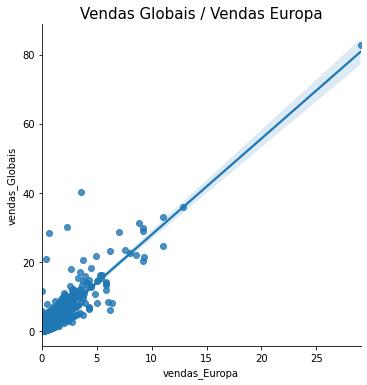

In [13]:
sns.lmplot(x = 'vendas_Europa', y = 'vendas_Globais', data=dataframe)
plt.title('Vendas Globais / Vendas Europa', fontdict = {'fontsize': 15})

Text(0.5, 1.0, 'Vendas Globais / Vendas Japão')

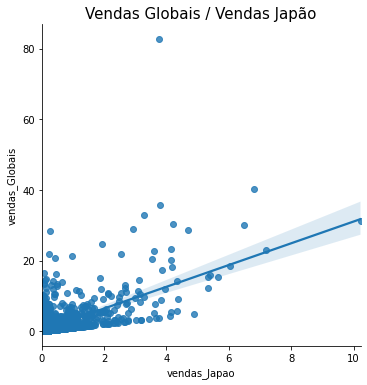

In [14]:
sns.lmplot(x = 'vendas_Japao', y = 'vendas_Globais', data=dataframe)
plt.title('Vendas Globais / Vendas Japão', fontdict = {'fontsize': 15})

Text(0.5, 1.0, 'Vendas Globais / Vendas outras regiões')

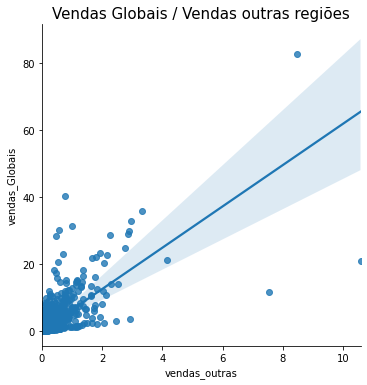

In [15]:
sns.lmplot(x = 'vendas_outras', y = 'vendas_Globais', data=dataframe)
plt.title('Vendas Globais / Vendas outras regiões', fontdict = {'fontsize': 15})

---


##Como foram as vendas globais ao longo dos anos?


---

In [16]:
# Agrupando o dataframe por ano, e apontando a soma de vendas de cada.
vendas_por_ano = pd.DataFrame(dataframe.groupby('Ano')['vendas_Globais'].sum()).reset_index()

vendas_por_ano.head()

,Ano,vendas_Globais
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


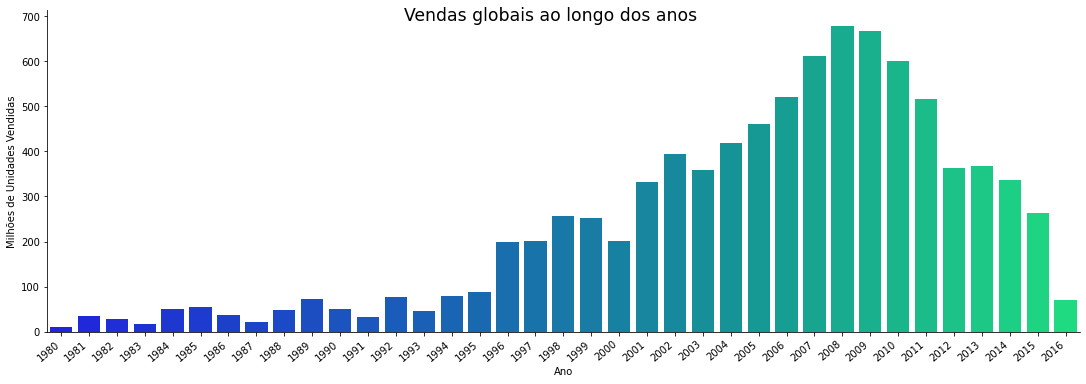

In [17]:
# plotando um gráfico com os dados agrupados acima

g_vendasGlobais_porAno = sns.catplot(
    data = vendas_por_ano,
    x = 'Ano', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3,
    palette = 'winter'
    
)

g_vendasGlobais_porAno.set_xticklabels(rotation = 40, horizontalalignment='right')
g_vendasGlobais_porAno.fig.suptitle('Vendas globais ao longo dos anos', fontsize = 'xx-large')
g_vendasGlobais_porAno.set_ylabels('Milhões de Unidades Vendidas')


Text(0.5, 0, 'Ano')

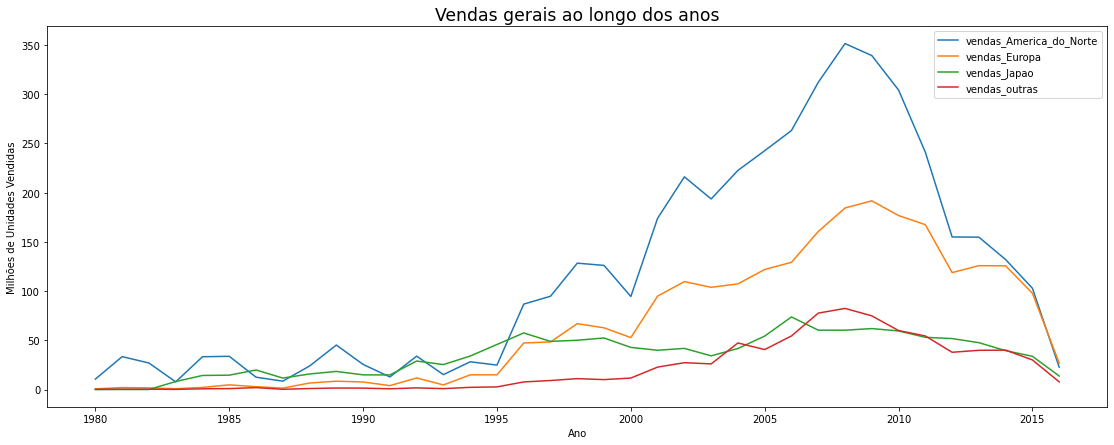

In [18]:
# Agrupando os dados pelo ano novamente, e separando as vendas de cada região
por_ano = dataframe.groupby('Ano')
somaVendas_porAno = por_ano[['vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras']].sum()

somaVendas_porAno.plot(figsize=(19, 7))
plt.title('Vendas gerais ao longo dos anos', fontsize='xx-large')
plt.ylabel('Milhões de Unidades Vendidas')
plt.xlabel('Ano')


---
## Qual foi a soma de vendas em cada região?
---

In [19]:
# Separando a soma de todas vendas de cada região

valor_1 = ((dataframe["vendas_America_do_Norte"].sum())/1000).round(2)
valor_2 = ((dataframe["vendas_Europa"].sum())/1000).round(2)
valor_3 = ((dataframe["vendas_Japao"].sum())/1000).round(2)
valor_4 = ((dataframe["vendas_outras"].sum())/1000).round(2)


# coloquei os dados em um dataframe

somaVendas = pd.DataFrame({
    'Região': ['América do norte', 'Europa', 'Japão', 'Outras'],
    'Soma de Vendas': [valor_1, valor_2, valor_3, valor_4]
})

In [20]:
somaVendas

,Região,Soma de Vendas
0,América do norte,4.33
1,Europa,2.41
2,Japão,1.28
3,Outras,0.79


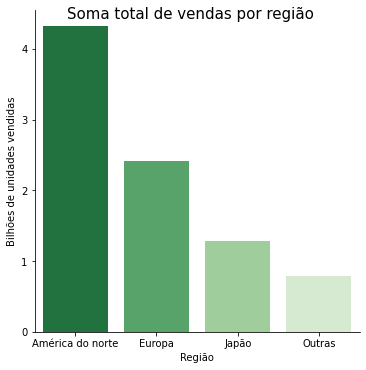

In [21]:
g = sns.catplot(
    data = somaVendas,
    x = 'Região',
    y = 'Soma de Vendas',
    kind = 'bar',
    palette = 'Greens_r'
)

g.fig.suptitle('Soma total de vendas por região', fontsize=15)
g.set_ylabels('Bilhões de unidades vendidas')

In [22]:
# Calculando o percentual de cada região em relação as vendas globais
somaVendas['Percentual'] = somaVendas['Soma de Vendas'] / somaVendas['Soma de Vendas'].sum()
somaVendas

,Região,Soma de Vendas,Percentual
0,América do norte,4.33,0.491487
1,Europa,2.41,0.273553
2,Japão,1.28,0.145289
3,Outras,0.79,0.089671


nota-se portanto que as vendas na América do Norte representam quase a metade das vendas de Video Game históricamente

Text(0.5, 1.0, 'Total de vendas por região')

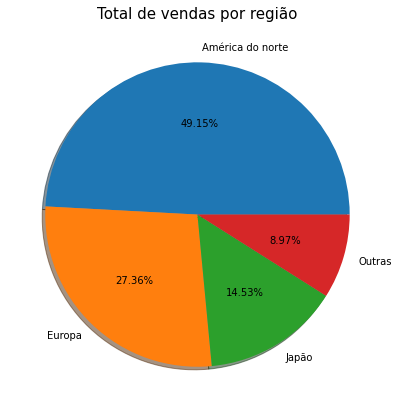

In [23]:
plt.rc('figure', figsize = (7,7))
plt.pie(somaVendas['Percentual'], labels=somaVendas['Região'].unique(), autopct='%1.2f%%', shadow=True)
plt.title('Total de vendas por região', fontdict={'fontsize': 15})

---
##Lançamento de jogos ao longo dos anos
---

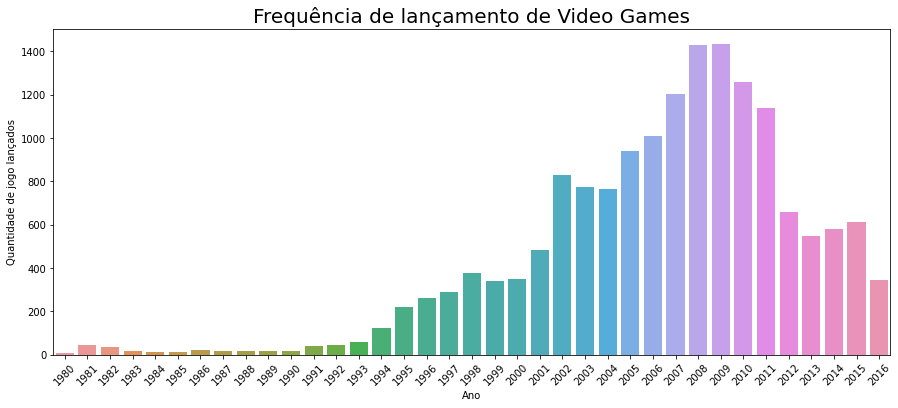

In [24]:
plt.rc('figure', figsize = (15,6))
sns.countplot(x=dataframe['Ano'], data=dataframe)
plt.title("Frequência de lançamento de Video Games", fontdict={'fontsize': 20})
plt.xlabel("Ano")
plt.ylabel("Quantidade de jogo lançados")
plt.xticks(rotation=45)
plt.show()

Existe correlação entre as vendas globais e a frequencia de lançamento?

In [25]:
frequencia = pd.DataFrame(dataframe['Ano'].value_counts().sort_index().reset_index())
frequencia.columns = ['Ano', 'frequencia']
frequencia['vendas_Globais'] = vendas_por_ano['vendas_Globais']
frequencia[['frequencia', 'vendas_Globais']].corr()

,frequencia,vendas_Globais
frequencia,1.000000,0.982668
vendas_Globais,0.982668,1.000000


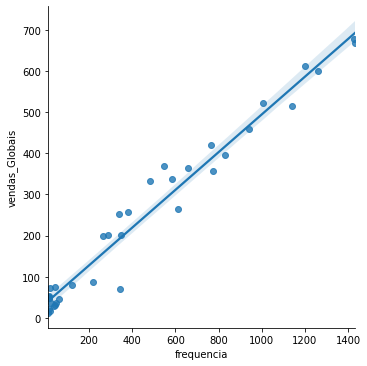

In [26]:
sns.lmplot(x='frequencia', y='vendas_Globais', data=frequencia)

nota-se um fortíssima correlação entre as vendas globais em a frequência de lançamento de jogos

---


##Qual a variação nas vendas globais?

---

In [27]:
# Algumas estatísticas descritivas do dataframe
dataframe[['vendas_Globais', 'vendas_America_do_Norte', 'vendas_Europa', 'vendas_Japao', 'vendas_outras']].describe()

,vendas_Globais,vendas_America_do_Norte,vendas_Europa,vendas_Japao,vendas_outras
count,16324.000000,16324.000000,16324.000000,16324.000000,16324.000000
mean,0.540328,0.265464,0.147581,0.078673,0.048334
std,1.565860,0.821658,0.508809,0.311584,0.189902
min,0.010000,0.000000,0.000000,0.000000,0.000000
25%,0.060000,0.000000,0.000000,0.000000,0.000000
50%,0.170000,0.080000,0.020000,0.000000,0.010000
75%,0.480000,0.240000,0.110000,0.040000,0.040000
max,82.740000,41.490000,29.020000,10.220000,10.570000


In [28]:
area = plt.figure(figsize=[15, 5])

<Figure size 1080x360 with 0 Axes>

In [29]:
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)

In [30]:
# Plotando dois gráficos referentes à distribuição de vendas globais

g1.boxplot(dataframe['vendas_Globais'])
g1.set_title('Distribuição das Vendas Globais (100%)')
g1.set_ylabel('Milhões de Unidades Vendidas')

g2.hist(dataframe['vendas_Globais'], bins = 40)
g2.set_title('Distribuição das Vendas Globais (100%)')
g2.set_ylabel('Milhões de Unidades Vendidas')
g2.set_xlabel('Quantidade de Jogos')

Text(0.5, 0, 'Quantidade de Jogos')

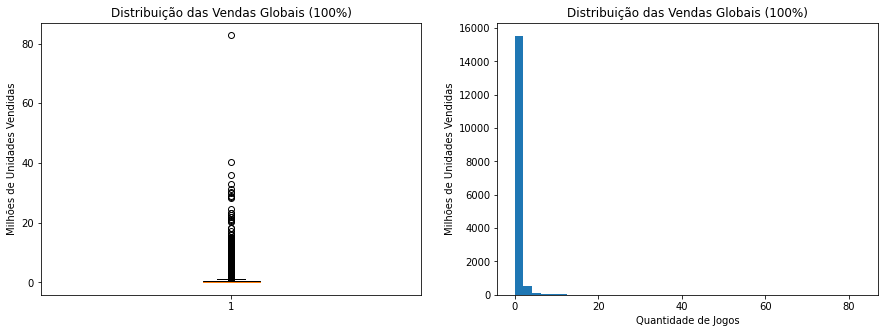

In [31]:
area






Nota-se, ao checar a distribuição de 100% das vendas globais, uma enorme assimetria. Tendo isso em vista,foram feitos então os gráficos abaixo, onde os outliers foram retirados






In [32]:
# Primeiramente separo a coluna de vendas globais
vendas = dataframe[['vendas_Globais']]

In [33]:
# Definindo os valores dos quartis, e os limite inferiores e superiores

Q1 = vendas.quantile(.25)
Q3 = vendas.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [34]:
"""
criando uma variável para a seleção dos valores que estão somente acima do 
limite superior e abaixo do limite inferior

essa seleção serve para podermos retirar os outliers dos dados de vendas globais
"""

selecao = (vendas >= limite_inferior) & (vendas <= limite_superior)

In [35]:
# aplicando a seleção feita acima no dataframe original

dataframe_II = dataframe[selecao]

Os dois gráficos abaixo foram plotados com a seleção e sem os outliers

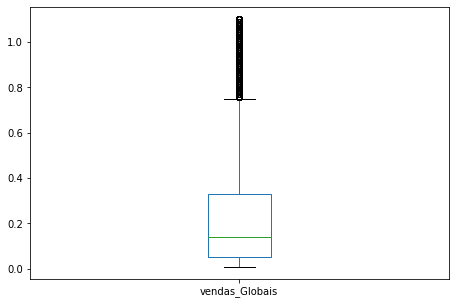

In [36]:
plt.rc('figure', figsize = (7.5, 5))
dataframe_II.boxplot(['vendas_Globais'], grid=False)

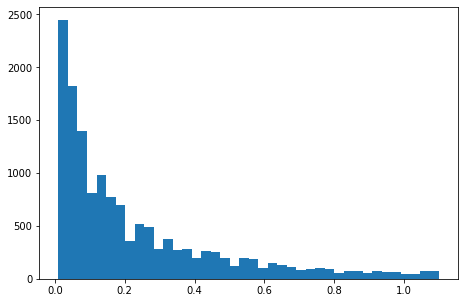

In [37]:
dataframe_II['vendas_Globais'].hist(bins=40, grid=False)

In [38]:
dataframe_II['vendas_Globais'].describe()

count    14497.000000
mean         0.234295
std          0.246820
min          0.010000
25%          0.050000
50%          0.140000
75%          0.330000
max          1.100000
Name: vendas_Globais, dtype: float64

In [39]:
# Checando o valor máximo das vendas globais sem os outliers
dataframe_II['vendas_Globais'].max()

1.1

In [40]:
# Checando o valor mínimo das vendas globais sem os outliers
dataframe_II['vendas_Globais'].min()

0.01

In [41]:
# Verificando a quantidade de outliers apagados
len(dataframe_II[dataframe_II['vendas_Globais'].isnull()])

1827

In [42]:
# Checando, no dataframe anterior, se a linha de código acima está correta
len(dataframe[dataframe['vendas_Globais'].isnull()])

0

---

##Quais são os Video Games que mais venderam?

---

In [43]:
vendas_por_nome = dataframe.sort_values(by='Ranking').reset_index().head(20)[['Nome', 'vendas_Globais']]
vendas_por_nome.head()

,Nome,vendas_Globais
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37


Text(0.5, 0.98, 'Top 20 jogos que mais venderam')

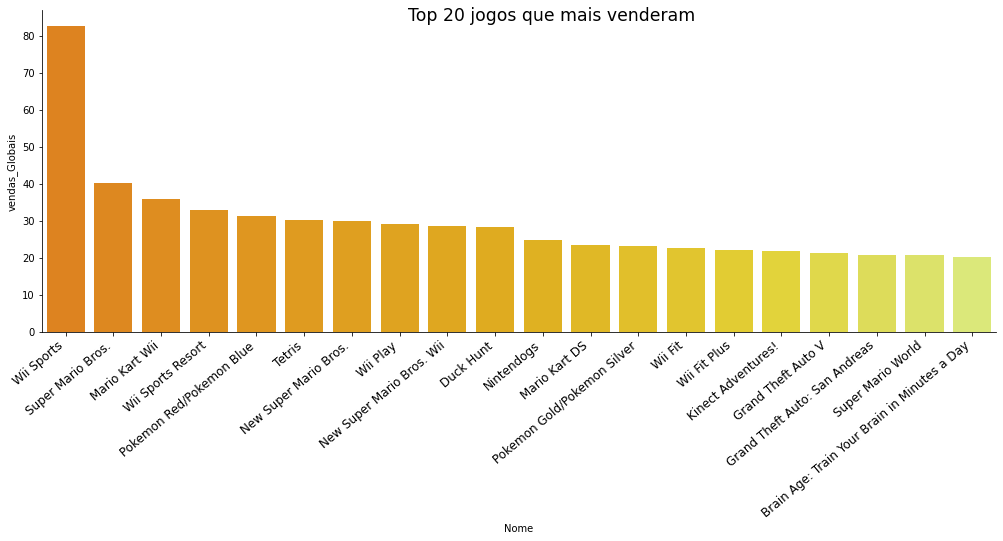

In [44]:

g_vendasGlobais_porNome = sns.catplot(
    data = vendas_por_nome,
    x = 'Nome', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3,
    palette = 'Wistia_r'
)


g_vendasGlobais_porNome.set_xticklabels(rotation = 40, horizontalalignment='right', fontsize='large')
g_vendasGlobais_porNome.fig.suptitle('Top 20 jogos que mais venderam', fontsize = 'xx-large')

---

##Quais são as editoras que mais venderam?

---

In [45]:
# Separando as vendas globais por editora, e depois transformando em um dataset
vendas_por_editora = pd.DataFrame(dataframe.groupby('Editora')['vendas_Globais'].sum().sort_values(ascending=False)).reset_index()

vendas_por_editora

,Editora,vendas_Globais
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
...,...,...
571,Michaelsoft,0.01
572,Media Entertainment,0.01
573,Takuyo,0.01
574,EON Digital Entertainment,0.01


Text(0.5, 0.98, 'Vendas por editoras')

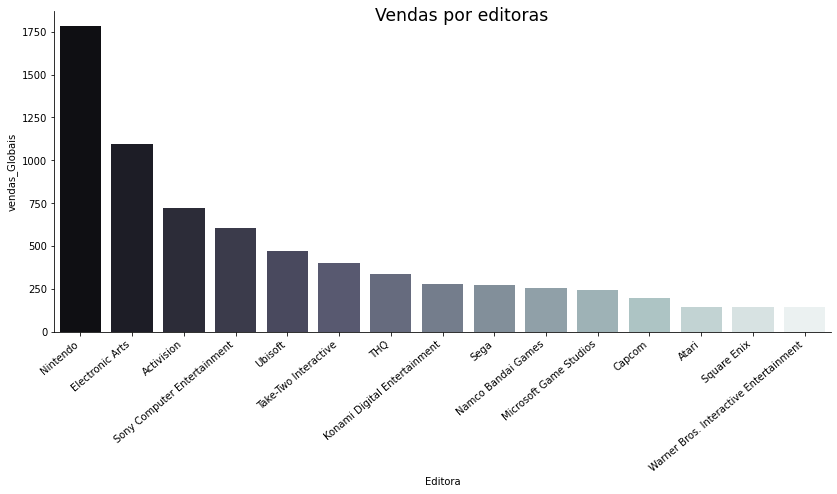

In [46]:
# Plotando um gráfico que demonstra as vendas globais das 10 editoras que mais vendem
grafico_vendasGlobais_porEditora = sns.catplot(
    data = vendas_por_editora.head(15),
    x = 'Editora', 
    y = 'vendas_Globais',
    kind = 'bar',
    palette = 'bone',
    aspect = 2.5    
)

grafico_vendasGlobais_porEditora.set_xticklabels(rotation = 40, horizontalalignment='right')
grafico_vendasGlobais_porEditora.fig.suptitle('Vendas por editoras', fontsize = 'xx-large')

## Consoles

In [47]:
dataframe['Plataforma'].unique()

array(['2600', 'NES', 'PC', 'DS', 'GB', 'SNES', 'GEN', 'GG', 'SCD', 'NG',
       'PS', 'SAT', '3DO', 'TG16', 'N64', 'PCFX', 'DC', 'WS', 'PS2', 'XB',
       'GBA', 'GC', 'PSP', 'X360', 'Wii', 'PS3', '3DS', 'PSV', 'WiiU',
       'PS4', 'XOne'], dtype=object)

In [48]:
produzidos_por_console = pd.DataFrame(dataframe['Plataforma'].value_counts()).reset_index()
produzidos_por_console.columns = ['Plataforma', 'Quantidade']
produzidos_por_console.head()

,Plataforma,Quantidade
0,DS,2133
1,PS2,2127
2,PS3,1304
3,Wii,1290
4,X360,1235


Text(0.5, 0.98, 'Quantidade de jogos produzidos por plataforma')

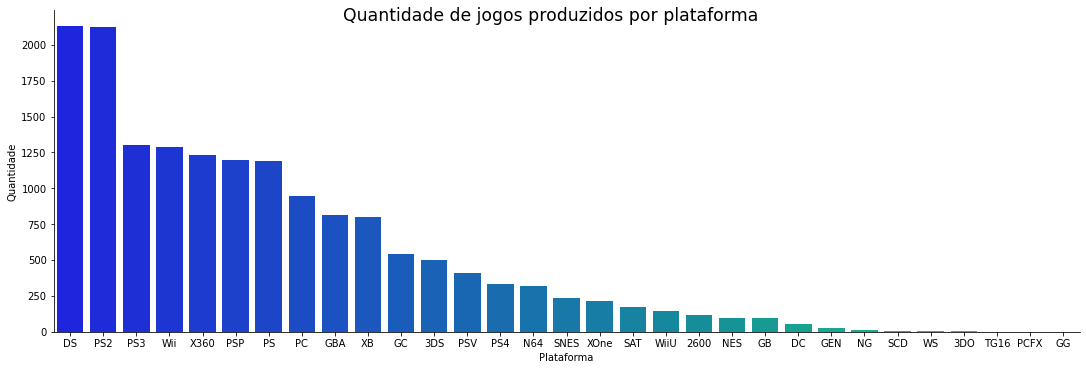

In [49]:
g_produzidos_porConsole = sns.catplot(
    data = produzidos_por_console,
    x = 'Plataforma', 
    y = 'Quantidade',
    kind = 'bar',
    aspect = 3,
    palette = 'winter'
)

g_produzidos_porConsole.fig.suptitle('Quantidade de jogos produzidos por plataforma', fontsize = 'xx-large')

In [50]:
vendas_por_console = pd.DataFrame(dataframe.groupby('Plataforma')['vendas_Globais'].sum().sort_values(ascending=False)).reset_index()
vendas_por_console.head()

,Plataforma,vendas_Globais
0,PS2,1233.46
1,X360,969.61
2,PS3,949.35
3,Wii,909.81
4,DS,818.96


Text(0.5, 0.98, 'Quantidade de vendas por plataforma')

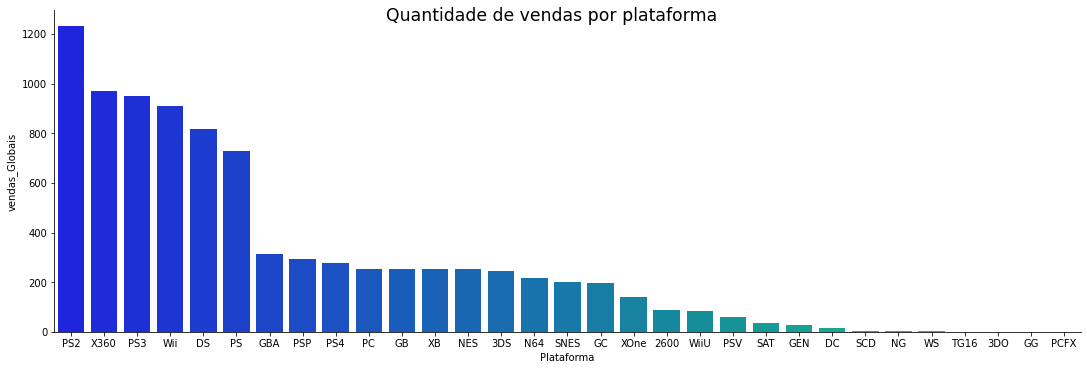

In [51]:
g_vendasGlobais_porConsole = sns.catplot(
    data = vendas_por_console,
    x = 'Plataforma', 
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 3,
    palette = 'winter'
)

g_vendasGlobais_porConsole.fig.suptitle('Quantidade de vendas por plataforma', fontsize = 'xx-large')

## Gêneros

In [52]:
# Vendo todos os generos do dataframe
dataframe['Genero'].unique()

array(['Shooter', 'Misc', 'Fighting', 'Sports', 'Action', 'Platform',
       'Puzzle', 'Racing', 'Simulation', 'Adventure', 'Role-Playing',
       'Strategy'], dtype=object)

In [53]:
# Transformando em um df a quantidade jogos produzidos por gênero
produzidos_por_genero = pd.DataFrame(dataframe['Genero'].value_counts()).reset_index()
produzidos_por_genero.columns = ['Genero', 'Quantidade']

produzidos_por_genero

,Genero,Quantidade
0,Action,3252
1,Sports,2304
2,Misc,1710
3,Role-Playing,1469
4,Shooter,1282
5,Adventure,1276
6,Racing,1226
7,Platform,876
8,Simulation,851
9,Fighting,836


Text(0.5, 0.98, 'Gêneros mais produzidos')

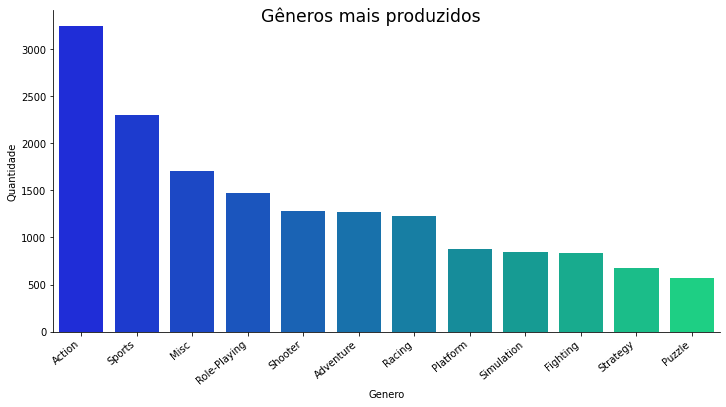

In [54]:
g_produzidos_porGenero = sns.catplot(
    data=produzidos_por_genero,
    x = 'Genero',
    y = 'Quantidade',
    kind = 'bar',
    aspect = 2,
    palette = 'winter'    
)

g_produzidos_porGenero.set_xticklabels(rotation = 40, horizontalalignment='right')
g_produzidos_porGenero.fig.suptitle('Gêneros mais produzidos', fontsize = 'xx-large')

In [55]:
vendas_por_genero = pd.DataFrame(dataframe.groupby('Genero')['vendas_Globais'].sum().sort_values(ascending=False)).reset_index()

vendas_por_genero

,Genero,vendas_Globais
0,Action,1722.87
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.80
4,Platform,829.15
5,Misc,797.62
6,Racing,726.77
7,Fighting,444.05
8,Simulation,390.16
9,Puzzle,242.22


Text(0.5, 0.98, 'Gêneros mais vendidos')

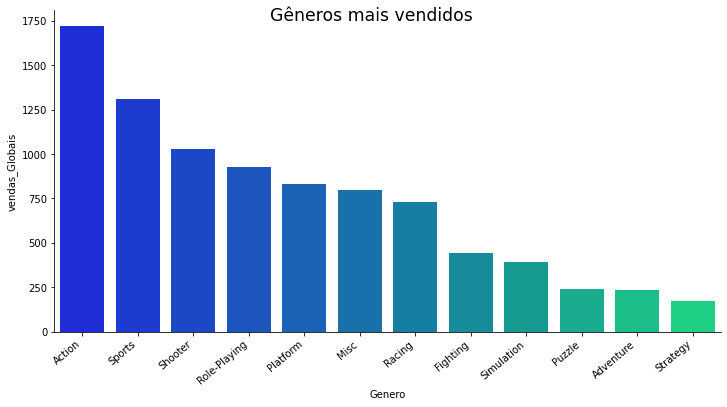

In [56]:
g_vendasGlobais_porGenero = sns.catplot(
    data=vendas_por_genero,
    x = 'Genero',
    y = 'vendas_Globais',
    kind = 'bar',
    aspect = 2,
    palette='winter'
    
)

g_vendasGlobais_porGenero.set_xticklabels(rotation = 40, horizontalalignment='right')
g_vendasGlobais_porGenero.fig.suptitle('Gêneros mais vendidos', fontsize = 'xx-large')